#### Algoritmo de agrupación K-means 
## Factores que podrían influir en colisiones automovilisticas.
### Visualizando datos de Accidentes

Actualización a 2022

### Introducción

Los accidentes de tráfico representan una preocupación importante para la seguridad vial en todo el mundo, causando pérdidas humanas y materiales significativas cada año. La comprensión de los factores que contribuyen a la ocurrencia de estos incidentes es esencial para desarrollar estrategias efectivas de prevención y mitigación. En este contexto, el presente análisis de datos juega un papel crucial al proporcionar información valiosa sobre los patrones y tendencias asociadas con los incidentes de tráfico.

En este trabajo, se aborda el desafío de analizar una base de datos de accidentes de tráfico utilizando el algoritmo de aprendizaje no supervisado conocido como K-Means. Este algoritmo tiene como objetivo principal agrupar los datos en clústeres significativos, lo que permite identificar patrones subyacentes y segmentar los datos en categorías similares.
La base de datos utilizada en este estudio contiene información ciertamente límitada sobre accidentes de tráfico ocurridos en distintas regiones durante el año 2022. Es por esto que únicamente se límita a buscar responder o analizar factores que podrían explicar los tipos de colisiones. 

Algunas de las variables que se incluyen son: la ubicación del accidente (urbana, suburbana), tipo de accidente, características del vehículo, sexo, edad, y otros factores relevantes como el consumo de bebidas alcohólicas, hora, día de la semana y los meses con mayores accidentes.

El objetivo principal de este trabajo es aplicar el algoritmo K-Means a la base de datos de accidentes de tráfico con el fin de identificar patrones y tendencias significativas así como responder las hipótesis que más adelante se plantean. 
En resumen, este estudio ayudará a la comprensión y la mitigación de los riesgos asociados a los tipos de colisión, utilizando técnicas avanzadas de análisis de datos y aprendizaje automático para extraer información significativa de una gran cantidad de datos. Los hallazgos obtenidos a partir de este análisis proporcionarán información útil para comprender mejor los factores que contribuyen a las colisiones y orientarán el desarrollo de medidas preventivas y políticas de seguridad vial.

En consecuencia, lo que se busca es dar respuesta a las siguientes hipótesis que a nuestro parecer son relevantes. 


## Hipótesis
Hipótesis 1: La mayoría de las colisiones se deben a las bebidas alcohólicas y es muy probable que coincidan con fines de semana. 

Hipótesis 2: Los fines de semana podrían ser los días en con más colisiones mortales que los días entre semana.

Hipótesis 3: Las colisiones que son con motocicletas, es muy probable que la mayoría de los casos concluyan con un lamentable fallecimiento. 


In [1]:
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 100)
from pandas.plotting import scatter_matrix
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install pip
#!pip install --upgrade seaborn
#!pip install --upgrade numpy

In [2]:
# Opciones de visualizació de cifras:
pd.options.display.float_format = '{:,.2f}'.format #'${:,.2f}'

In [ ]:
## Descarga de datos


In [3]:
# Cara renglón en este data set es una persona

ruta_archivo = "C:/Users/Lizeth Solano Romo/OneDrive - Universidad Autónoma de Aguascalientes/2024/Diplomado UNAM/Modulo IV/Proyecto final/atus_anual_2022_1.csv"

# Lee el archivo CSV en un DataFrame de pandas
datos = pd.read_csv(ruta_archivo)

# Imprime las primeras filas del DataFrame
datos.head()


,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccid_cod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2022,1,3,45,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,2,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,53,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2022,1,4,0,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
3,Municipal,1,1,2022,1,4,15,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,16,0,1,0,2,0,0,0,0,0,0,0,0,2 fatal,Cifras Definitivas
4,Municipal,1,1,2022,1,5,56,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,41,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


In [ ]:
#

datos.tail()

In [ ]:
# Número de datos

datos.shape

In [ ]:
# Nombres de las columnas

datos.columns

## Claves de la 'CLASIFICACION FINAL'
Corresponde al tipo de accidente de tránsito, de acuerdo con las siguientes descripciones: 

1) Caída de pasajero Accidente: donde una o más personas que viajan en el vehículo, (excluyendo al conductor), caen fuera del mismo. No se considera este tipo de accidente si la caída fue por consecuencia de otro tipo de accidente. 
2) Colisión con animal: Es aquel accidente en el que un vehículo de motor arrolla a cualquier tipo de animal provocando daños materiales, inclusive lesiones leves o fatales a personas ocupantes o no del vehículo.
3) Colisión con ciclista: Hecho en el cual un vehículo automotor de cualquier tipo, arrolla a un ciclista sobre la vía de circulación o en un cruce vial. 
4) Colisión con ferrocarril: Choque de un vehículo automotor con una locomotora, vagón, góndola o cualquier otro vehículo clasificado como transporte ferroviario. 
5) Colisión con motocicleta: Percance vial en donde un vehículo automotor de cualquier tipo, tiene un encuentro violento, accidental o imprevisto con una motocicleta. Incluso se puede dar el caso de que sea entre dos motocicletas.  
6) Colisión con objeto fijo: Encuentro violento de un vehículo de motor con cualquier tipo de objeto, que por sus características se encuentre sujeto al piso o asentado en él, tales como postes, guarniciones, señales de tránsito, árboles, contenedores de basura, etc. También se incluye en este tipo de colisión, el percance de un automotor en movimiento contra otro estacionado. 
7) Colisión con peatón: Evento vial donde un vehículo de motor arrolla o golpea a una persona que transita o que se encuentra en alguna vía pública, provocando lesiones leves o fatales. 
8) Colisión con vehículo automotor: Encuentro violento, accidental o imprevisto de dos o más vehículos en una vía de circulación, del cual resultan averías, daños, pérdida parcial o total de vehículos o propiedades, así como lesiones leves y/o fatales a personas. Puede ser lateral, frontal o por alcance. 
9) Incendio: Es el accidente ocasionado por un corto circuito, derrame de combustible o cuestiones desconocidas, que propician la generación de fuego mediante el cual se consume parcial o totalmente el vehículo automotor.  
10) Otro: Cualquier otro tipo de accidente que no pueda ser clasificado en los 11 incisos descritos anteriormente, tales como derrumbes, deslaves o cualquier otro objeto que caiga sobre los vehículos en circulación y como consecuencia se produzca algún accidente vial.
11) Salida del camino: Evento en donde el vehículo, por causas circunstanciales, abandona de manera violenta e imprevista la vía de circulación por la cual transita. Incluso si por la acción del vehículo cae a una zanja, cuneta, barranca, etc. 
12) Volcadura: Es el tipo de accidente que debido a las circunstancias que lo originan, provocan que el vehículo pierda su posición normal, incluso dé una o varias volteretas. 

In [ ]:
# Tipo de caso que analizaremos y cómo los clasificaremos

datos['TIPACCID'].value_counts()


In [ ]:
# Tipo de caso en código que analizaremos 

datos['tipaccid_cod'].value_counts()

In [ ]:
## Claves de la 'CLASIFICACION FINAL'


#* 1 = Caída de pasajero
#* 2 = Colisión con animal 
#* 3 = Colisión con ciclista
#* 4 = Colisión con ferrocarril
#* 5 = Colisión con motocicleta
#* 6 = Colisión con objeto fijo
#* 7 = Colisión con peatón (atropellamiento) 
#* 8 = Colisión con vehículo automotor
#* 9 = Incendio
#* 10 = Otro
#* 11 = Salida del camino
#* 12 = Volcadura 


# Clasificando los casos por tipo de accidente y colisión


La RAE, define Accidente como "un suceso eventual o acción de que involuntariamente resulta daño para las personas o las cosas". Es decir, es un suceso que ocurre sin intención o expectativa humana y que provoca daños, pérdidas o lesiones no deseadas o no intencionadas a una persona o a una propiedad. Este no es el caso en una colisión entre vehículos según FARAHI, una firma de aborgados, expertos de delitos en lesiones personales y accidentes de Los Angeles, "Nunca sucede por casualidad, ya que es el resultado de una serie de eventos perpetrados, por una parte responsable"[1]. 

En consecuencia se analizarán únicamente las colisiones y se dejara por fuera los que a consideración pueden ser catalogados de otra manera. 

In [ ]:
## Casos colisión

#* 2 = Colisión con animal 
#* 3 = Colisión con ciclista
#* 4 = Colisión con ferrocarril
#* 5 = Colisión con motocicleta
#* 6 = Colisión con objeto fijo
#* 7 = Colisión con peatón (atropellamiento) 
#* 8 = Colisión con vehículo automotor


In [87]:
# Filtra los datos por la colisión
colision = datos.loc[(datos["tipaccid_cod"].isin([2,3, 4,5,6,7,8]))]

colision.shape

(267436, 46)

In [ ]:
## Otros casos de accidentes

#* 1 = Caida de pasajero
#* 9 = Incendio
#* 10 = Otro
#* 11 = Salida del camino
#* 12 = Volcadura 


## Gráfica - Histograma de accidentes de colisión por sexo

Según datos de la Secretaría de Infraestructura, Comunicaciones y Transportes (SICT) revelan que el padrón de conductores del servicio de autotransporte federal y privado contaba en septiembre de 2022 con una plantilla de 500 mil 463 hombres y solo dos mil 703 mujeres, es decir, el 99.5% son conductores hombres y el 0.5% mujeres. Para determinar quiénes chocan más, los hombres o las mujeres, podemos calcular la proporción de choques por género. Luego, podemos calcular cuántos hombres chocan por cada mujer.

In [ ]:
# CLAVE DESCRIPCIÓN
# 1 - MUJER
# 2 - HOMBRE

colision['SEXO'].value_counts()

In [ ]:
#cantidad de colisiones por edad

colision['ID_EDAD'].value_counts()

In [88]:
# Colisiones generadas por sexo: Hombre y por edad
columnas_originales = ['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA', 'ID_MINUTO', 'ID_DIA', 
                       'DIASEMANA', 'URBANA', 'SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION',
                       'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET', 'BICICLETA',
                       'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'ID_EDAD', 'CONDHERIDO', 
                       'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO', 'CLASACC', 'ESTATUS']
columnas_muertos = ['PASAMUERTO', 'PEATMUERTO', 'CONDMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']
columnas_heridos = ['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']

# Calcula la suma de las columnas de muertos y asigna el resultado a una nueva columna llamada "muertos"
#datos['muertos'] = datos[columnas_muertos].sum(axis=1)
colision['muertos'] = datos[columnas_muertos].sum(axis=1)

colision['heridos']= datos[columnas_heridos].sum(axis=1)

Calcular la proporción de choques por género:
#### Hombres: 218,662 choques
#### Mujeres: 48,774 choques
   Proporción de choques para hombres: $\frac{218,662}{500,463}$ = 0.436
   Proporción de choques para mujeres: $\frac{48,774}{2703}$ = 18.046

Comprobando las proporciones:
La proporción de choques por conductor es significativamente mayor para las mujeres (18.046) que para los hombres (0.436).
Entonces, aunque hay muchos más choques en términos absolutos causados por hombres debido a su gran mayoría en la población de conductores, en promedio, las mujeres tienen más probabilidades de verse involucradas en un choque. 

¿Cuántos hombres chocan por cada mujer?

$\frac{0.436}{18.046}$ = 0.024
Por lo tanto, aproximadamente 0.024 hombres chocan por cada mujer que choca.

En resumen, aunque hay más choques totales causados por hombres debido a su mayoría en el número de conductores, en promedio, las mujeres tienen más probabilidades de chocar. Por cada mujer que choca, aproximadamente 0.024 hombres chocan.

In [21]:
colision['muertos'].value_counts()

0     265411
1       1847
2        131
3         29
4         12
6          3
5          2
10         1
Name: muertos, dtype: int64

In [22]:
colision['heridos'].value_counts()

0     221277
1      35457
2       7605
3       1837
4        695
5        277
6        107
7         61
8         38
10        19
9         13
13         8
15         8
11         7
12         6
16         4
14         3
22         2
19         2
18         2
26         1
21         1
25         1
31         1
43         1
20         1
23         1
27         1
Name: heridos, dtype: int64

In [ ]:
# Colisiones generadas por sexo: Mujer y por edad
colision[colision['SEXO'] == 1 ]['ID_EDAD']

In [ ]:
# Histograma:

H = colision[colision['SEXO'] == 2]['ID_EDAD']

M = colision[colision['SEXO'] == 1]['ID_EDAD']


plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(H, bins=30, alpha=0.75, label='Hombres')
plt.hist(M, bins=30, alpha=0.75, label='Mujeres')


# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Accidentes por colisión acumulados por edad', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [ ]:
# Cantidad de colisiones por día de la semana
# Los días de la semana en la que se presentan la mayor cantidad de accidentes son Sabado, Viernes, Lunes, Jueves

colision["DIASEMANA"].value_counts()

In [ ]:
# Cantidad de colisiones por hora

colision["ID_HORA"].value_counts()

In [ ]:
# Cantidad de colisiones el día sabado por hora
colision[colision['DIASEMANA'] == 'Sabado' ]['ID_HORA'].value_counts()

In [ ]:
# Cantidad de colisiones el día Viernes por hora
colision[colision['DIASEMANA'] == 'Viernes' ]['ID_HORA'].value_counts()

In [ ]:
# Cantidad de colisiones el día Lunes por hora
colision[colision['DIASEMANA'] == 'lunes' ]['ID_HORA'].value_counts()

In [ ]:
# Cantidad de colisiones el día Jueves por hora
colision[colision['DIASEMANA'] == 'Jueves' ]['ID_HORA'].value_counts()

In [ ]:
# Histograma:

S = colision[colision['DIASEMANA'] == 'Sabado' ]['ID_HORA']
V = colision[colision['DIASEMANA'] == 'Viernes' ]['ID_HORA']

#L = colision[colision['DIASEMANA'] == 'lunes' ]['ID_HORA'].value_counts()

J = colision[colision['DIASEMANA'] == 'Jueves' ]['ID_HORA']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(S, bins=30, alpha=0.75, label='Sabado')
plt.hist(V, bins=30, alpha=0.75, label='Viernes')
#plt.hist(L, bins=30, alpha=0.75, label='Lunes')
plt.hist(J, bins=30, alpha=0.75, label='Jueves')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Accidentes por colisión acumulados en Sábado, Viernes, Jueves', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Hora', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

## Accidentes por colisión



In [24]:
colision['muertos'].value_counts()

0     265411
1       1847
2        131
3         29
4         12
6          3
5          2
10         1
Name: muertos, dtype: int64

In [23]:
colision['heridos'].value_counts()

0     221277
1      35457
2       7605
3       1837
4        695
5        277
6        107
7         61
8         38
10        19
9         13
13         8
15         8
11         7
12         6
16         4
14         3
22         2
19         2
18         2
26         1
21         1
25         1
31         1
43         1
20         1
23         1
27         1
Name: heridos, dtype: int64

In [ ]:
## Gráfica - Histograma colisión con/sin aliento por edad

In [ ]:
#datos.head

In [28]:
colision[colision['ALIENTO'] == 3 ]['heridos']

6         0
12        0
224       0
375       0
387       1
         ..
288749    0
288752    2
288753    2
288755    0
288830    0
Name: heridos, Length: 51694, dtype: int64

In [29]:
colision[colision['ALIENTO'] == 3 ]['muertos']

6         1
12        1
224       0
375       0
387       0
         ..
288749    0
288752    1
288753    0
288755    0
288830    1
Name: muertos, Length: 51694, dtype: int64

In [25]:
# CLAVE	DESCRIPCIÓN ALIENTO EN ACCIDENTE POR COLISIÓN Y POR EDAD
# 1 - Si
# 2 - NO
# 3- Se ignora

colision[colision['ALIENTO'] == 1 ]['ID_EDAD']


0         20
1         53
5         32
9         55
15        24
          ..
289228    23
289230    39
289235    21
289242    37
289257    38
Name: ID_EDAD, Length: 15997, dtype: int64

In [ ]:
colision[colision['ALIENTO'] == 1 ]['ID_EDAD']

In [ ]:
# Histograma:

AA = colision[colision['ALIENTO'] == 1 ]['ID_EDAD']

A = colision[colision['ALIENTO'] == 2 ]['ID_EDAD']
SA=colision[colision['ALIENTO'] == 3 ]['ID_EDAD']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(A, bins=30, alpha=0.75, label='NO ALIENTO',color='grey')
plt.hist(AA, bins=30, alpha=0.75, label='ALIENTO', color='pink')
plt.hist(SA, bins=30, alpha=0.75, label='SE IGNORA',color='white')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Colisiones acumuladas dependiendo si había Aliento Alcohólico por Edad)', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [32]:
# Colisiones con mayor cantidad de incidencias
#* 5 = Colisión con motocicleta
#* 6 = Colisión con objeto fijo
#* 8 = Colisión con vehículo automotor
Colision_dia = colision[ ( colision["tipaccid_cod"].isin( [8,5,6] ) ) & ( colision['ID_DIA'].isin([3,1,6,7]) ) ]
Colision_dia.shape 



(35229, 48)

In [34]:
# Agrupamiento de colisiones seleccionadas por sexo
# 1 - MUJER
# 2 - HOMBRE

Colision_dia['SEXO'].value_counts()


2    28755
1     6474
Name: SEXO, dtype: int64

In [40]:
Colision_dia[Colision_dia['SEXO'] == 2]['ID_EDAD']

0         20
1         53
2         23
3         16
4         41
          ..
289227    22
289228    23
289229    31
289231    57
289232    17
Name: ID_EDAD, Length: 28755, dtype: int64

In [ ]:
# Histograma:

H = Colision_dia[(Colision_dia['SEXO'] == 2) ]['ID_EDAD']

M = Colision_dia[(Colision_dia['SEXO'] == 1) ]['ID_EDAD']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(H, bins=30, alpha=0.75, label='Hombres')
plt.hist(M, bins=30, alpha=0.75, label='Mujeres')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Colisiones acumuladas por edad', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [ ]:
##Series de colisiones por fechas

In [50]:
#Colision_dia.head

In [57]:
# Agrupando por fechas: 
# *6=Jueves
# * 1=Sabado
# * 3 =Lunes
# * 7= Viernes

Grupo_dia_semana = Colision_dia.groupby("ID_DIA")

# Guardamos como Data Frame

Serie_colision = Grupo_dia_semana.size().to_frame("Colision_dia").reset_index()

Serie_colision.head()

,ID_DIA,Colision_dia
0,1,10415
1,3,8335
2,6,8249
3,7,8230


In [ ]:
#series de muertes por fecha de mayor incidencia en colisiones de mayor ocurrencia

In [54]:


#Colision_dia = colision[ ( colision["tipaccid_cod"].isin([5,6,8]) )  & ( colision['ID_DIA'].isin([3,1,6,7]) ) ]
#Colision_dia.shape

In [58]:
# Agrupando por fechas: 
# * 6 = Jueves
# * 1 = Sabado
# * 3 = Lunes
# * 7 = Viernes

Grupo_muertos_dia = Colision_dia.groupby("ID_DIA")

# Guardamos como Data Frame

Serie_muertos = Grupo_muertos_dia.size().to_frame("muertos").reset_index()

Serie_muertos.head()

,ID_DIA,muertos
0,1,10415
1,3,8335
2,6,8249
3,7,8230


In [7]:
#print(otros)

In [ ]:
##Series  accidentes por fecha, los de mayor incidencia registrada

In [56]:
#NOTA: ESTA SERIE NO SE TOMA PARA EL GRÁFICO, SOLO LAS COLISIONES MUERTE Y HERIDOS

# Agrupando por fechas: 
# *6=Jueves
# * 1=Sabado
# * 3 =Lunes
# * 7= Viernes

Grupo_heridos_dia = Colision_dia.groupby("ID_DIA")

# Guardamos como Data Frame

Serie_heridos = Grupo_heridos_dia.size().to_frame("heridos").reset_index()

Serie_heridos.head()

,ID_DIA,heridos
0,1,10415
1,3,8335
2,6,8249
3,7,8230


In [ ]:
## Graficando

In [81]:
# Preparamos DataFrame's

colision_d = Serie_colision[['ID_DIA','Colision_dia' ]] # Fecha de síntomas

muertos_d = Serie_muertos[['ID_DIA','muertos']] # Fecha de ingreso

heridos_d = Serie_heridos[['ID_DIA','heridos']] # Fecha de defunción



In [82]:
# Unimos las series: 
Series_Casos = pd.merge(colision_d, muertos_d, how = 'outer', on = 'ID_DIA')
Series_Casos = Series_Casos.rename(columns = {'Colision_dia': 'Colision'})
Series_Casos = Series_Casos.rename(columns = {'muertos': 'Muertos'})
Series_Casos = pd.merge(Series_Casos,heridos_d, how = 'outer', on = 'ID_DIA')
Series_Casos = Series_Casos.rename(columns = {'heridos': 'Heridos'})
Series_Casos.head()



,ID_DIA,Colision,Muertos,Heridos
0,1,10415,10415,10415
1,3,8335,8335,8335
2,6,8249,8249,8249
3,7,8230,8230,8230


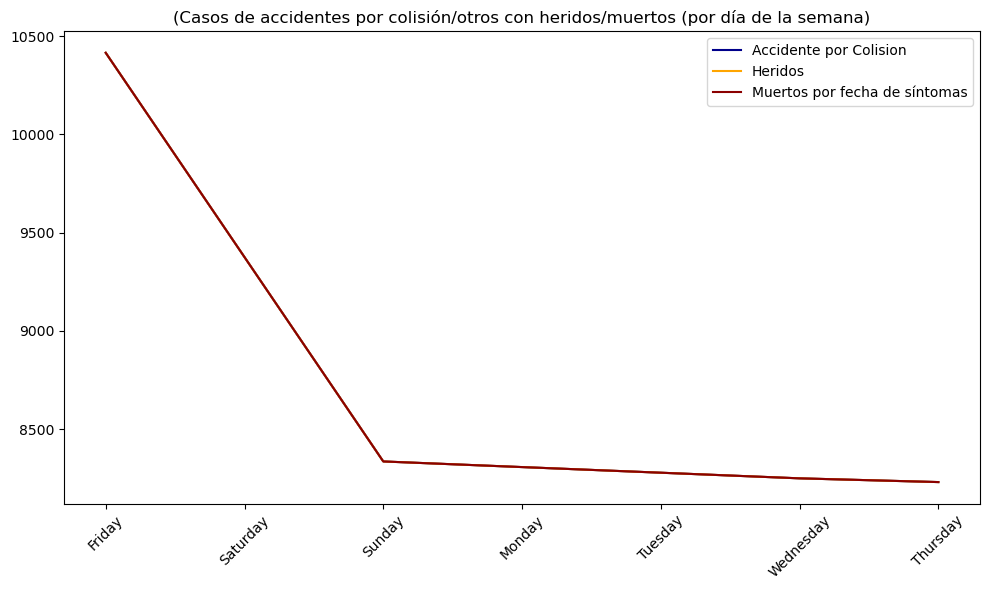

In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['ID_DIA'], Series_Casos['Colision'], label='Accidente por Colision', color='darkblue')
plt.plot(Series_Casos['ID_DIA'], Series_Casos['Heridos'], label='Heridos', color='orange')
plt.plot(Series_Casos['ID_DIA'], Series_Casos['Muertos'], label='Muertos por fecha de síntomas', color='darkred')
#plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'], label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('(Casos de accidentes por colisión/otros con heridos/muertos (por día de la semana)')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%A'))
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

In [84]:
#REsultados a archivo CSV:
Series_Casos.to_csv('Series_Casos.csv',index=False,encoding='utf-8-sig')

## Algoritmos de agrupamiento (clustering)

Sabemos que los algoritmos pertenecientes a la familia del Aprendizaje No Supervisado no tienen ninguna variable que predecir ligada a los datos. En lugar de tener una salida, los datos solo tienen una entrada que serían múltiples variables que describen los datos. Aquí es donde entra en juego la agrupación.

Clustering es la tarea de agrupar un conjunto de objetos de manera que los objetos del mismo grupo sean más similares entre sí que a los objetos de otros grupos. La similitud es una métrica que refleja la fuerza de la relación entre dos objetos de datos. 

La agrupación en clústeres se utiliza principalmente (pero no exclusivamente) para la exploración de datos. Tiene múltiples usos en muchos campos, como el machine learning, el reconocimiento de patrones, el análisis de imágenes, la recuperación de información, la bioinformática, la compresión de datos y los gráficos por computadora.

Hacemos un repaso de esas técnicas.

### K-medias

Existen muchos modelos de agrupación. Revisaremos los más populares. A pesar de su simplicidad, K-means se utiliza ampliamente para la agrupación en clústeres en muchas aplicaciones de ciencia de datos, lo que es especialmente útil si necesita descubrir rápidamente información a partir de datos sin etiquetar. En este notebook, vemos cómo utilizar k-Means para la segmentación de casos.

In [89]:
#

colisiones_KM = colision.loc[(datos["tipaccid_cod"].isin([5,6,8]))]

colisiones_KM.shape

(255497, 48)

In [90]:
#

colisiones_KM.tail()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccid_cod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,muertos,heridos
289260,Municipal,32,56,2022,12,7,38,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,50,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
289261,Municipal,32,56,2022,12,7,45,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,1,2,3,31,0,1,0,0,0,0,0,0,0,0,0,0,2 fatal,Cifras Definitivas,0,1
289262,Municipal,32,56,2022,12,8,0,30,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
289263,Municipal,32,56,2022,12,14,45,31,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,48,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
289264,Municipal,32,56,2022,12,22,15,31,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con motocicleta,5,0,1,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,2,2,3,27,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0


In [91]:
# Las variables relevantes de la tabla:
#  'ID_ENTIDAD', 'ID_MUNICIPIO', 'SEXO', 'EDAD', 'TIPACCID, 
# 'ID_HORA', 'DIASEMANA', 'MES'
# 'ALIENTO', 'muertos', 'heridos'

colisiones_KM.head()

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,tipaccid_cod,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,muertos,heridos
0,Municipal,1,1,2022,1,2,48,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,20,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
1,Municipal,1,1,2022,1,3,45,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,2,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,1,3,53,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
2,Municipal,1,1,2022,1,4,0,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0
3,Municipal,1,1,2022,1,4,15,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,6,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,16,0,1,0,2,0,0,0,0,0,0,0,0,2 fatal,Cifras Definitivas,0,3
4,Municipal,1,1,2022,1,5,56,1,Sabado,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,8,0,2,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,2,2,3,41,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,0,0


In [92]:
# 

colisiones_KM.ID_ENTIDAD.value_counts(normalize=True)

19   0.20
26   0.08
8    0.07
15   0.05
16   0.04
11   0.04
14   0.04
5    0.04
28   0.04
30   0.03
21   0.03
10   0.03
22   0.03
2    0.03
31   0.03
24   0.03
17   0.03
23   0.02
9    0.02
25   0.02
3    0.02
6    0.01
1    0.01
20   0.01
4    0.01
12   0.01
13   0.01
32   0.01
18   0.01
29   0.00
7    0.00
27   0.00
Name: ID_ENTIDAD, dtype: float64

In [93]:


colisiones_KM.ID_MUNICIPIO.value_counts(normalize=True)

39    0.08
19    0.05
5     0.05
30    0.04
46    0.04
      ... 
169   0.00
170   0.00
173   0.00
179   0.00
209   0.00
Name: ID_MUNICIPIO, Length: 240, dtype: float64

In [94]:
# 

colisiones_KM.SEXO.value_counts(normalize = True)

2   0.82
1   0.18
Name: SEXO, dtype: float64

In [95]:
# 

colisiones_KM.ID_EDAD.value_counts(normalize = True)

30   0.03
32   0.03
28   0.03
27   0.03
25   0.03
     ... 
93   0.00
91   0.00
94   0.00
95   0.00
98   0.00
Name: ID_EDAD, Length: 85, dtype: float64

In [96]:
#

colisiones_KM.tipaccid_cod.value_counts(normalize = True)



8   0.71
5   0.17
6   0.12
Name: tipaccid_cod, dtype: float64

In [97]:

# 
colisiones_KM.ID_DIA.value_counts(normalize = True)

1    0.04
15   0.03
14   0.03
5    0.03
9    0.03
17   0.03
22   0.03
4    0.03
10   0.03
12   0.03
16   0.03
19   0.03
18   0.03
11   0.03
3    0.03
23   0.03
26   0.03
8    0.03
20   0.03
6    0.03
7    0.03
13   0.03
2    0.03
28   0.03
25   0.03
27   0.03
24   0.03
21   0.03
30   0.03
29   0.03
31   0.02
Name: ID_DIA, dtype: float64

In [98]:
# 

colisiones_KM.DIASEMANA.value_counts(normalize = True)

Sabado      0.16
Viernes     0.15
lunes       0.14
Jueves      0.14
Martes      0.14
Miercoles   0.14
Domingo     0.13
Name: DIASEMANA, dtype: float64

In [99]:
# 

colisiones_KM.MES.value_counts(normalize = True)

5    0.09
12   0.09
10   0.09
3    0.09
7    0.09
6    0.08
8    0.08
11   0.08
4    0.08
9    0.08
2    0.08
1    0.07
Name: MES, dtype: float64

In [100]:
#  1= Si aliento
# 2 = No Aliento
# 3= se fugó

colisiones_KM.ALIENTO.value_counts(normalize = True)

2   0.75
3   0.19
1   0.06
Name: ALIENTO, dtype: float64

In [101]:
# 

colisiones_KM.muertos.value_counts(normalize = True)

0    0.99
1    0.01
2    0.00
3    0.00
4    0.00
6    0.00
5    0.00
10   0.00
Name: muertos, dtype: float64

In [102]:
# 

colisiones_KM.heridos.value_counts(normalize = True)

0    0.86
1    0.11
2    0.03
3    0.01
4    0.00
5    0.00
6    0.00
7    0.00
8    0.00
10   0.00
9    0.00
13   0.00
11   0.00
15   0.00
12   0.00
16   0.00
14   0.00
22   0.00
19   0.00
26   0.00
21   0.00
18   0.00
25   0.00
31   0.00
43   0.00
20   0.00
23   0.00
27   0.00
Name: heridos, dtype: float64

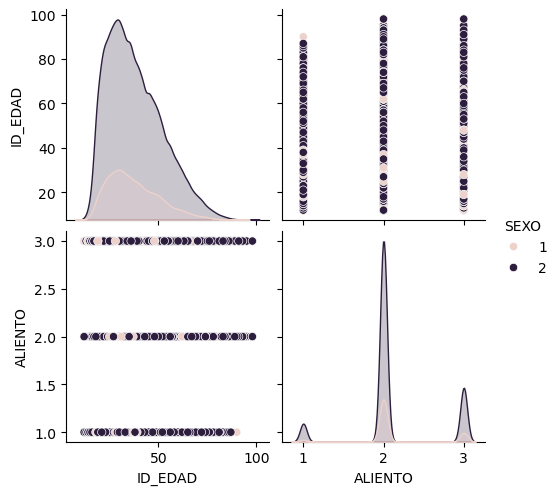

In [103]:
# Let's see our data in a detailed way with pairplot

sns.pairplot( colisiones_KM[ [ 'SEXO','ID_EDAD', 'ALIENTO'] ] , hue = 'SEXO' )

plt.show()

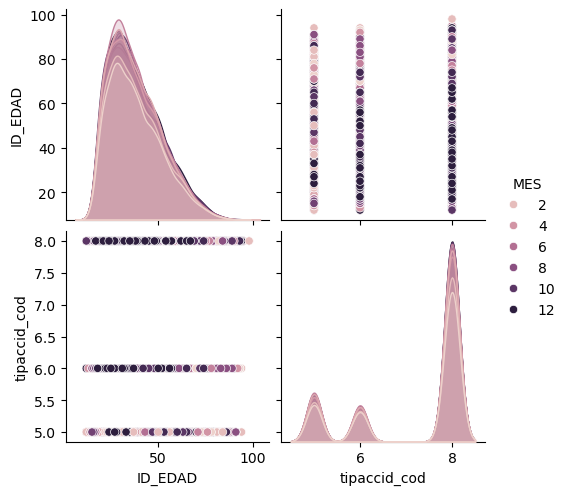

In [104]:
# Let's see our data in a detailed way with pairplot


sns.pairplot( colisiones_KM[ [ 'MES','ID_EDAD', 'tipaccid_cod'] ] , hue = 'MES' )

plt.show()

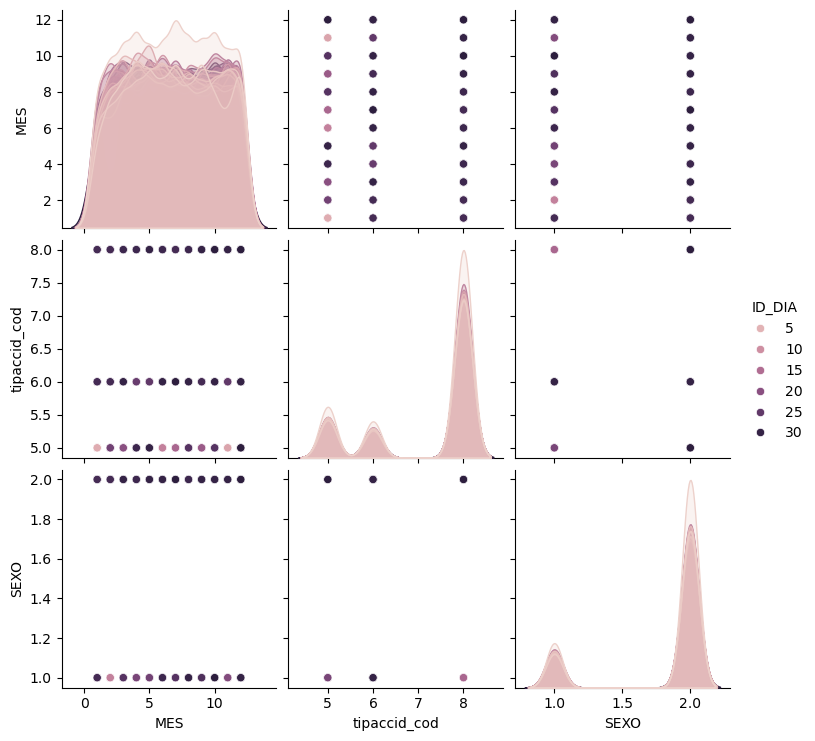

In [105]:
sns.pairplot( colisiones_KM[ [ 'MES','ID_DIA', 'tipaccid_cod', 'SEXO'] ] , hue = 'ID_DIA' )

plt.show()

In [ ]:
De los gráficos anteriores vemos que el género y otras variables no parecen tener relación directa con la segmentación de defunciones. Es por eso que podemos dejarlo y continuar con otras características, razón por la cual usaremos el parámetro X de ahora en adelante.

In [ ]:
# Definimos X:

#X = colisiones_KM [ [ '' ] ]

In [ ]:
# 

km = KMeans( n_clusters = 3 ).fit( X.drop(['ID_REGISTRO'], axis = 1) )

km.inertia_ #km.labels_

#km = KMeans(n_clusters=3).fit(X.drop(['ID_REGISTRO'], axis=1))
#print(km.inertia_) 
#print(km.labels_)


In [ ]:
#

clusters = []

#
for i in range(1, 11):
    km = KMeans( n_clusters = i ).fit( X.drop(['ID_REGISTRO'], axis = 1) )
    clusters.append( km.inertia_ )

#
fig, ax = plt.subplots( figsize = (12, 8) )
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy = (2, 91797400), xytext = (2, 110000000), xycoords = 'data',          
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

ax.annotate('Possible Elbow Point', xy = (3, 72737691), xytext = (3, 90000000), xycoords = 'data',          
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

plt.show()

El método del codo nos dice que seleccionemos el grupo cuando hay un cambio significativo en la inercia. Como podemos ver en el gráfico, podemos decir que puede ser 2 o 3. Veamos ambos resultados en el gráfico y decidamos.

In [ ]:
# 2 cluster
km2 = KMeans(n_clusters = 2).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km2.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 2 Clusters')

plt.show()

In [ ]:
# 3 cluster
km3 = KMeans(n_clusters = 3).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

In [ ]:
# 6 cluster
km6 = KMeans(n_clusters = 6).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km6.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 6 Clusters')

plt.show()

In [ ]:
#

X[ X['Labels'] == 0].describe()

In [ ]:
#

X[ X['Labels'] == 1].describe()

In [ ]:
#

X[ X['Labels'] == 2].describe()

In [ ]:
#

X[ X['Labels'] == 3].describe()

In [ ]:
#

X[ X['Labels'] == 4].describe()

In [ ]:
#

X[ X['Labels'] == 5].describe()